In [1]:
#pip install tensorflow keras

In [2]:
import cartopy.crs as ccrs                   # import projections
import cartopy
import cartopy.feature as cfeature

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import matplotlib.dates as mdates
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 



from glob import glob
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap
m = Basemap(resolution='i') 



from datetime import datetime
%matplotlib inline


import gsw


import os

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#from math import sqrt
import statsmodels.api as sm
from scipy import stats
import scipy.signal as signal

from math import sqrt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.interpolate import griddata
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import cross_val_score


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

In [6]:
#the data

df = pd.read_csv('elnino.csv')

In [7]:
df.head()

Observation   Year   Month   Day    Date   Latitude   Longitude  \
0            1     80       3     7  800307      -0.02     -109.46   
1            2     80       3     8  800308      -0.02     -109.46   
2            3     80       3     9  800309      -0.02     -109.46   
3            4     80       3    10  800310      -0.02     -109.46   
4            5     80       3    11  800311      -0.02     -109.46   

   Zonal Winds  Meridional Winds  Humidity  Air Temp  Sea Surface Temp  
0         -6.8               0.7         .     26.14             26.24  
1         -4.9               1.1         .     25.66             25.97  
2         -4.5               2.2         .     25.69             25.28  
3         -3.8               1.9         .     25.57             24.31  
4         -4.2               1.5         .      25.3             23.19

### cleaning and preprocessing

In [8]:
df.isnull().sum()

Observation          0
 Year                0
 Month               0
 Day                 0
 Date                0
 Latitude            0
 Longitude           0
 Zonal Winds         0
 Meridional Winds    0
 Humidity            0
 Air Temp            0
 Sea Surface Temp    0
dtype: int64

In [9]:
#checking for non-numeric values

In [10]:
#checking for non numeric values
# select only columns with non-numeric data types
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns

# loop through each non-numeric column and check for non-numeric values
for col in non_numeric_columns:
    non_numeric_count = df[col].apply(lambda x: not pd.isna(x) and not str(x).isnumeric()).sum()
    if non_numeric_count > 0:
        print(f"{col} has {non_numeric_count} non-numeric value(s)")
    else:
        print(f"{col} has no non-numeric values")

 Zonal Winds has 175229 non-numeric value(s)
 Meridional Winds has 169017 non-numeric value(s)
 Humidity has 167141 non-numeric value(s)
 Air Temp has 176500 non-numeric value(s)
 Sea Surface Temp has 176402 non-numeric value(s)


In [11]:
# select only columns with non-numeric data types
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns

# loop through each non-numeric column and check for non-numeric values
for col in non_numeric_columns:
    non_numeric_count = df[col].apply(lambda x: not pd.isna(x) and not str(x).isnumeric()).sum()
    if non_numeric_count > 0:
        print(f"{col} has {non_numeric_count} non-numeric value(s). Converting to numeric...")
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"{col} converted to numeric.")
    else:
        print(f"{col} has no non-numeric values")

 Zonal Winds has 175229 non-numeric value(s). Converting to numeric...
 Zonal Winds converted to numeric.
 Meridional Winds has 169017 non-numeric value(s). Converting to numeric...
 Meridional Winds converted to numeric.
 Humidity has 167141 non-numeric value(s). Converting to numeric...
 Humidity converted to numeric.
 Air Temp has 176500 non-numeric value(s). Converting to numeric...
 Air Temp converted to numeric.
 Sea Surface Temp has 176402 non-numeric value(s). Converting to numeric...
 Sea Surface Temp converted to numeric.


In [12]:
df.isnull().sum()

Observation              0
 Year                    0
 Month                   0
 Day                     0
 Date                    0
 Latitude                0
 Longitude               0
 Zonal Winds         25163
 Meridional Winds    25162
 Humidity            65761
 Air Temp            18237
 Sea Surface Temp    17007
dtype: int64

In [13]:
df.size

2136960

In [14]:
#handling missing data

In [15]:
# interpolate null values using linear interpolation
df = df.interpolate(method='linear', limit_direction='both')

# check if there are still null values
if df.isna().sum().sum() > 0:
    print("Warning: there are still null values in the dataframe")
else:
    print("All null values have been interpolated")

All null values have been interpolated


In [16]:
df[' Date'].dtype

dtype('int64')

In [17]:
#converting Date column to datetime 

In [18]:
# convert the Date column to datetime data type
df[' Date'] = pd.to_datetime(df[' Date'])

In [19]:
#rename the columns
df = df.rename(columns={' Year':'Year', ' Month':'Month', ' Day':'Day', ' Date':'Date', ' Latitude':'Latitude',
       ' Longitude':'Longitude', ' Zonal Winds':'Zonal_Winds', ' Meridional Winds':'Meridional_Winds', ' Humidity':'Humidity',
       ' Air Temp':'Air_Temp', ' Sea Surface Temp':'Sea_Surface_Temp'})

In [20]:
# combine the columns into a single string in the format 'YYYY-MM-DD'
df['R_Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2) + '-' + df['Day'].astype(str).str.zfill(2)

# convert the string to a datetime object
df['R_Date'] = pd.to_datetime(df['R_Date'])

In [21]:
df = df.drop(columns=['Date'])

In [22]:
df.corr()

Observation      Year     Month       Day  Latitude  \
Observation          1.000000  0.297054 -0.009746 -0.000032 -0.035549   
Year                 0.297054  1.000000 -0.113791 -0.008831 -0.015654   
Month               -0.009746 -0.113791  1.000000  0.010957  0.000357   
Day                 -0.000032 -0.008831  0.010957  1.000000 -0.000491   
Latitude            -0.035549 -0.015654  0.000357 -0.000491  1.000000   
Longitude           -0.068291 -0.042441 -0.001037 -0.001042  0.041597   
Zonal_Winds         -0.010295  0.035763  0.049278  0.006697  0.098274   
Meridional_Winds    -0.137205 -0.202877  0.225421  0.004167 -0.046588   
Humidity            -0.102131 -0.187170 -0.093290 -0.002167  0.135878   
Air_Temp             0.211421  0.256012 -0.114202 -0.002606  0.045596   
Sea_Surface_Temp     0.261178  0.276634 -0.078808 -0.000945  0.097621   

                  Longitude  Zonal_Winds  Meridional_Winds  Humidity  \
Observation       -0.068291    -0.010295         -0.137205 -0.102131   
Year              -0.042441     0.035763         -0.202877 -0.187170   
Month             -0.001037     0.049278          0.225421 -0.093290   
Day               -0.001042     0.006697          0.004167 -0.002167   
Latitude           0.041597     0.098274         -0.046588  0.135878   
Longitude          1.000000     0.380818         -0.110446 -0.000432   
Zonal_Winds        0.380818     1.000000          0.030540  0.059536   
Meridional_Winds  -0.110446     0.030540          1.000000  0.097956   
Humidity          -0.000432     0.059536          0.097956  1.000000   
Air_Temp           0.297381     0.225159         -0.359217 -0.302863   
Sea_Surface_Temp   0.292772     0.313010         -0.299470 -0.289783   

                  Air_Temp  Sea_Surface_Temp  
Observation       0.211421          0.261178  
Year              0.256012          0.276634  
Month            -0.114202         -0.078808  
Day              -0.002606         -0.000945  
Latitude          0.045596          0.097621  
Longitude         0.297381          0.292772  
Zonal_Winds       0.225159          0.313010  
Meridional_Winds -0.359217         -0.299470  
Humidity         -0.302863         -0.289783  
Air_Temp          1.000000          0.895937  
Sea_Surface_Temp  0.895937          1.000000

In [23]:
df.columns

Index(['Observation', 'Year', 'Month', 'Day', 'Latitude', 'Longitude',
       'Zonal_Winds', 'Meridional_Winds', 'Humidity', 'Air_Temp',
       'Sea_Surface_Temp', 'R_Date'],
      dtype='object')

In [24]:
#columns with parameters of interest


nino_df = df[['Latitude', 'Longitude','Zonal_Winds', 'Humidity', 'Air_Temp','Sea_Surface_Temp', 'R_Date']]

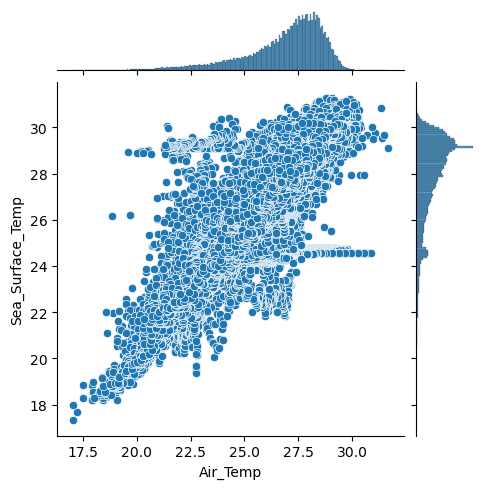

In [25]:
sns.jointplot(x='Air_Temp', y='Sea_Surface_Temp', data=df, size=5)

In [26]:
#visualization




#a chart that shows zonal winds and sst variation

<AxesSubplot:xlabel='R_Date'>

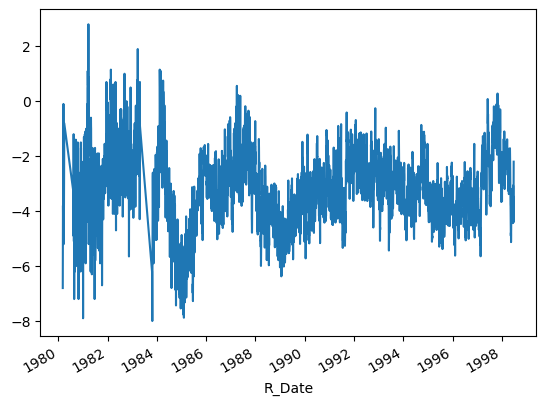

In [27]:
nino_df.groupby('R_Date')['Zonal_Winds'].mean().plot.line()

<AxesSubplot:xlabel='R_Date'>

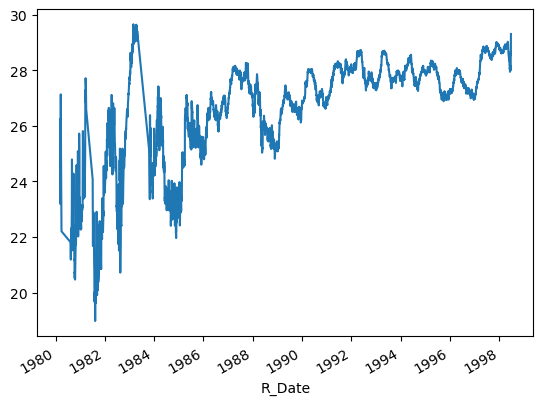

In [28]:
#SST changes over time

nino_df.groupby('R_Date')['Sea_Surface_Temp'].mean().plot.line()

In [29]:
nino_df.shape

(178080, 7)

In [30]:
df.shape

(178080, 12)

In [31]:
nino_df.Zonal_Winds.describe()

count    178080.000000
mean         -3.135025
std           3.359342
min         -12.400000
25%          -5.630154
50%          -3.800000
75%          -1.200000
max          14.300000
Name: Zonal_Winds, dtype: float64

### Predicting weather pattern..

In [32]:
filtered_nino = nino_df[(nino_df['Zonal_Winds'] <= 4.4) & (nino_df['Sea_Surface_Temp']   >= 26.5 )]

In [33]:
not_nino = nino_df[~nino_df.isin(filtered_nino)].dropna()

In [34]:
filtered_nino

Latitude  Longitude  Zonal_Winds  Humidity  Air_Temp  \
10         -0.02    -109.46         -0.1      81.2     27.28   
11         -0.02    -109.46         -1.2      81.2     26.86   
241         0.01    -109.56         -0.6      81.2     26.14   
242         0.01    -109.56          0.9      81.2     26.44   
243         0.01    -109.56         -2.0      81.2     25.78   
...          ...        ...          ...       ...       ...   
178075      8.96    -140.33         -5.1      94.1     26.04   
178076      8.96    -140.32         -4.3      93.2     25.80   
178077      8.95    -140.34         -6.1      81.3     27.17   
178078      8.96    -140.33         -4.9      76.2     27.36   
178079      8.95    -140.33         -4.9      76.2     27.09   

        Sea_Surface_Temp     R_Date  
10                 26.65 1980-03-17  
11                 27.13 1980-03-18  
241                27.28 1981-03-17  
242                26.97 1981-03-18  
243                26.86 1981-03-19  
...                  ...        ...  
178075             28.14 1998-06-11  
178076             27.87 1998-06-12  
178077             27.93 1998-06-13  
178078             28.03 1998-06-14  
178079             28.09 1998-06-15  

[131119 rows x 7 columns]

In [35]:
not_nino

Latitude  Longitude  Zonal_Winds  Humidity  Air_Temp  \
0          -0.02    -109.46         -6.8      81.2     26.14   
1          -0.02    -109.46         -4.9      81.2     25.66   
2          -0.02    -109.46         -4.5      81.2     25.69   
3          -0.02    -109.46         -3.8      81.2     25.57   
4          -0.02    -109.46         -4.2      81.2     25.30   
...          ...        ...          ...       ...       ...   
177949      8.96    -140.33         -3.6      77.9     25.45   
177950      8.95    -140.32         -4.7      78.4     25.14   
177951      8.97    -140.33         -6.6      69.4     25.45   
177953      8.96    -140.33         -8.8      80.9     25.73   
177987      8.96    -140.33         -6.9      77.9     25.84   

        Sea_Surface_Temp     R_Date  
0                  26.24 1980-03-07  
1                  25.97 1980-03-08  
2                  25.28 1980-03-09  
3                  24.31 1980-03-10  
4                  23.19 1980-03-11  
...                  ...        ...  
177949             26.36 1998-02-05  
177950             26.25 1998-02-06  
177951             26.38 1998-02-07  
177953             26.46 1998-02-09  
177987             26.48 1998-03-15  

[46961 rows x 7 columns]

In [36]:
print(filtered_nino.Humidity.describe())
print(not_nino.Humidity.describe())

count    131119.000000
mean         80.958681
std           5.200675
min          45.400000
25%          77.500000
50%          81.220868
75%          84.500000
max          99.900000
Name: Humidity, dtype: float64
count    46961.000000
mean        83.773254
std          4.815557
min         53.030446
25%         81.200000
50%         83.744799
75%         87.030416
max         99.900000
Name: Humidity, dtype: float64


In [37]:
df

Observation  Year  Month  Day  Latitude  Longitude  Zonal_Winds  \
0                 1    80      3    7     -0.02    -109.46         -6.8   
1                 2    80      3    8     -0.02    -109.46         -4.9   
2                 3    80      3    9     -0.02    -109.46         -4.5   
3                 4    80      3   10     -0.02    -109.46         -3.8   
4                 5    80      3   11     -0.02    -109.46         -4.2   
...             ...   ...    ...  ...       ...        ...          ...   
178075       178076    98      6   11      8.96    -140.33         -5.1   
178076       178077    98      6   12      8.96    -140.32         -4.3   
178077       178078    98      6   13      8.95    -140.34         -6.1   
178078       178079    98      6   14      8.96    -140.33         -4.9   
178079       178080    98      6   15      8.95    -140.33         -4.9   

        Meridional_Winds  Humidity  Air_Temp  Sea_Surface_Temp     R_Date  
0                    0.7      81.2     26.14             26.24 1980-03-07  
1                    1.1      81.2     25.66             25.97 1980-03-08  
2                    2.2      81.2     25.69             25.28 1980-03-09  
3                    1.9      81.2     25.57             24.31 1980-03-10  
4                    1.5      81.2     25.30             23.19 1980-03-11  
...                  ...       ...       ...               ...        ...  
178075              -0.4      94.1     26.04             28.14 1998-06-11  
178076              -3.3      93.2     25.80             27.87 1998-06-12  
178077              -4.8      81.3     27.17             27.93 1998-06-13  
178078              -2.3      76.2     27.36             28.03 1998-06-14  
178079              -2.3      76.2     27.09             28.09 1998-06-15  

[178080 rows x 12 columns]

In [38]:
#trade winds

In [39]:
df['Trade_Winds'] = np.sqrt(df.Meridional_Winds**2 + df.Zonal_Winds**2)

In [40]:
df.head()

Observation  Year  Month  Day  Latitude  Longitude  Zonal_Winds  \
0            1    80      3    7     -0.02    -109.46         -6.8   
1            2    80      3    8     -0.02    -109.46         -4.9   
2            3    80      3    9     -0.02    -109.46         -4.5   
3            4    80      3   10     -0.02    -109.46         -3.8   
4            5    80      3   11     -0.02    -109.46         -4.2   

   Meridional_Winds  Humidity  Air_Temp  Sea_Surface_Temp     R_Date  \
0               0.7      81.2     26.14             26.24 1980-03-07   
1               1.1      81.2     25.66             25.97 1980-03-08   
2               2.2      81.2     25.69             25.28 1980-03-09   
3               1.9      81.2     25.57             24.31 1980-03-10   
4               1.5      81.2     25.30             23.19 1980-03-11   

   Trade_Winds  
0     6.835934  
1     5.021952  
2     5.008992  
3     4.248529  
4     4.459821

In [41]:
df.corr()

Observation      Year     Month       Day  Latitude  \
Observation          1.000000  0.297054 -0.009746 -0.000032 -0.035549   
Year                 0.297054  1.000000 -0.113791 -0.008831 -0.015654   
Month               -0.009746 -0.113791  1.000000  0.010957  0.000357   
Day                 -0.000032 -0.008831  0.010957  1.000000 -0.000491   
Latitude            -0.035549 -0.015654  0.000357 -0.000491  1.000000   
Longitude           -0.068291 -0.042441 -0.001037 -0.001042  0.041597   
Zonal_Winds         -0.010295  0.035763  0.049278  0.006697  0.098274   
Meridional_Winds    -0.137205 -0.202877  0.225421  0.004167 -0.046588   
Humidity            -0.102131 -0.187170 -0.093290 -0.002167  0.135878   
Air_Temp             0.211421  0.256012 -0.114202 -0.002606  0.045596   
Sea_Surface_Temp     0.261178  0.276634 -0.078808 -0.000945  0.097621   
Trade_Winds          0.089041  0.022624 -0.025567 -0.005415 -0.027885   

                  Longitude  Zonal_Winds  Meridional_Winds  Humidity  \
Observation       -0.068291    -0.010295         -0.137205 -0.102131   
Year              -0.042441     0.035763         -0.202877 -0.187170   
Month             -0.001037     0.049278          0.225421 -0.093290   
Day               -0.001042     0.006697          0.004167 -0.002167   
Latitude           0.041597     0.098274         -0.046588  0.135878   
Longitude          1.000000     0.380818         -0.110446 -0.000432   
Zonal_Winds        0.380818     1.000000          0.030540  0.059536   
Meridional_Winds  -0.110446     0.030540          1.000000  0.097956   
Humidity          -0.000432     0.059536          0.097956  1.000000   
Air_Temp           0.297381     0.225159         -0.359217 -0.302863   
Sea_Surface_Temp   0.292772     0.313010         -0.299470 -0.289783   
Trade_Winds       -0.287424    -0.509427          0.030902 -0.006901   

                  Air_Temp  Sea_Surface_Temp  Trade_Winds  
Observation       0.211421          0.261178     0.089041  
Year              0.256012          0.276634     0.022624  
Month            -0.114202         -0.078808    -0.025567  
Day              -0.002606         -0.000945    -0.005415  
Latitude          0.045596          0.097621    -0.027885  
Longitude         0.297381          0.292772    -0.287424  
Zonal_Winds       0.225159          0.313010    -0.509427  
Meridional_Winds -0.359217         -0.299470     0.030902  
Humidity         -0.302863         -0.289783    -0.006901  
Air_Temp          1.000000          0.895937    -0.195673  
Sea_Surface_Temp  0.895937          1.000000    -0.250162  
Trade_Winds      -0.195673         -0.250162     1.000000

         Zonal_Winds  Meridional_Winds       Humidity       Air_Temp  \
count  178080.000000     178080.000000  178080.000000  178080.000000   
mean       -3.135025          0.240065      81.700905      26.872219   
std         3.359342          2.951238       5.250506       1.815038   
min       -12.400000        -11.600000      45.400000      17.050000   
25%        -5.630154         -1.700000      78.300000      26.040000   
50%        -3.800000          0.200000      81.700000      27.320000   
75%        -1.200000          2.224403      85.300000      28.170000   
max        14.300000         13.000000      99.900000      31.660000   

       Sea_Surface_Temp    Trade_Winds  
count     178080.000000  178080.000000  
mean          27.667895       5.056945  
std            2.068919       2.075624  
min           17.350000       0.000000  
25%           26.660000       3.507399  
50%           28.260000       5.206400  
75%           29.200000       6.621933  
max           31.260000

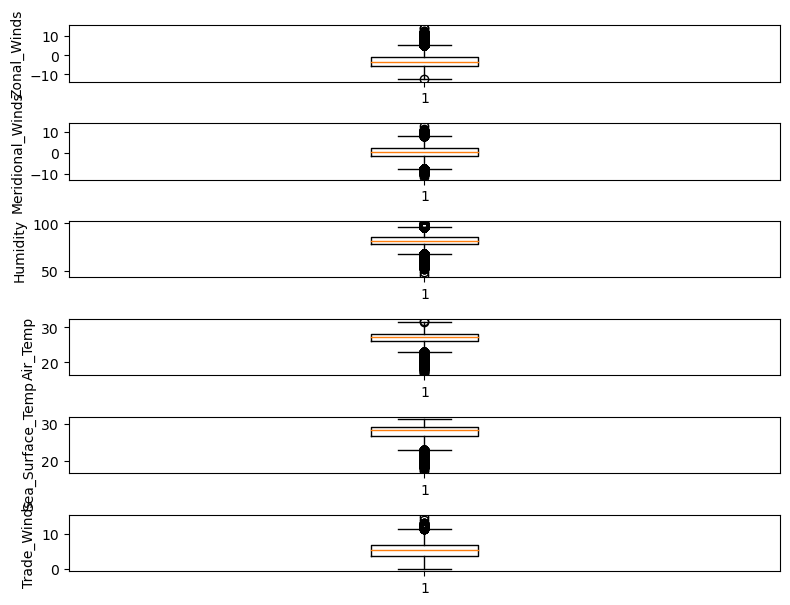

In [42]:

# Specify the columns to check for outliers
columns_to_check = ['Zonal_Winds', 'Meridional_Winds', 'Humidity', 'Air_Temp', 'Sea_Surface_Temp', 'Trade_Winds']

# Descriptive statistics
df_outliers = df[columns_to_check].describe()
print(df_outliers)

# Box plots
fig, axs = plt.subplots(len(columns_to_check), figsize=(8, 6))

for i, column in enumerate(columns_to_check):
    axs[i].boxplot(df[column])
    axs[i].set_ylabel(column)

plt.tight_layout()
plt.show()


In [43]:

# Define a function to remove outliers based on Z-score
def remove_outliers_zscore(dataframe, columns, threshold=3):
    for column in columns:
        z_scores = np.abs((dataframe[column] - dataframe[column].mean()) / dataframe[column].std())
        dataframe = dataframe[z_scores < threshold]
    return dataframe

# Specify the columns to remove outliers from
columns_to_remove_outliers = ['Zonal_Winds', 'Meridional_Winds', 'Humidity', 'Air_Temp', 'Sea_Surface_Temp', 'Trade_Winds']

# Remove outliers using Z-score method
df = remove_outliers_zscore(df, columns_to_remove_outliers)

# Print the cleaned DataFrame
print(df)


        Observation  Year  Month  Day  Latitude  Longitude  Zonal_Winds  \
0                 1    80      3    7     -0.02    -109.46         -6.8   
1                 2    80      3    8     -0.02    -109.46         -4.9   
2                 3    80      3    9     -0.02    -109.46         -4.5   
3                 4    80      3   10     -0.02    -109.46         -3.8   
4                 5    80      3   11     -0.02    -109.46         -4.2   
...             ...   ...    ...  ...       ...        ...          ...   
178075       178076    98      6   11      8.96    -140.33         -5.1   
178076       178077    98      6   12      8.96    -140.32         -4.3   
178077       178078    98      6   13      8.95    -140.34         -6.1   
178078       178079    98      6   14      8.96    -140.33         -4.9   
178079       178080    98      6   15      8.95    -140.33         -4.9   

        Meridional_Winds  Humidity  Air_Temp  Sea_Surface_Temp     R_Date  \
0                    0

In [44]:
df

Observation  Year  Month  Day  Latitude  Longitude  Zonal_Winds  \
0                 1    80      3    7     -0.02    -109.46         -6.8   
1                 2    80      3    8     -0.02    -109.46         -4.9   
2                 3    80      3    9     -0.02    -109.46         -4.5   
3                 4    80      3   10     -0.02    -109.46         -3.8   
4                 5    80      3   11     -0.02    -109.46         -4.2   
...             ...   ...    ...  ...       ...        ...          ...   
178075       178076    98      6   11      8.96    -140.33         -5.1   
178076       178077    98      6   12      8.96    -140.32         -4.3   
178077       178078    98      6   13      8.95    -140.34         -6.1   
178078       178079    98      6   14      8.96    -140.33         -4.9   
178079       178080    98      6   15      8.95    -140.33         -4.9   

        Meridional_Winds  Humidity  Air_Temp  Sea_Surface_Temp     R_Date  \
0                    0.7      81.2     26.14             26.24 1980-03-07   
1                    1.1      81.2     25.66             25.97 1980-03-08   
2                    2.2      81.2     25.69             25.28 1980-03-09   
3                    1.9      81.2     25.57             24.31 1980-03-10   
4                    1.5      81.2     25.30             23.19 1980-03-11   
...                  ...       ...       ...               ...        ...   
178075              -0.4      94.1     26.04             28.14 1998-06-11   
178076              -3.3      93.2     25.80             27.87 1998-06-12   
178077              -4.8      81.3     27.17             27.93 1998-06-13   
178078              -2.3      76.2     27.36             28.03 1998-06-14   
178079              -2.3      76.2     27.09             28.09 1998-06-15   

        Trade_Winds  
0          6.835934  
1          5.021952  
2          5.008992  
3          4.248529  
4          4.459821  
...             ...  
178075     5.115662  
178076     5.420332  
178077     7.762087  
178078     5.412947  
178079     5.412947  

[172022 rows x 13 columns]

In [45]:
# Create two separate dataframes for east and west latitude
east_pacific = df[df['Longitude'] <= -180]
west_pacific = df[df['Longitude'] > -180]

In [46]:
west_pacific.Trade_Winds.describe()

count    171951.000000
mean          5.026545
std           2.059961
min           0.000000
25%           3.482815
50%           5.200000
75%           6.603787
max          11.043550
Name: Trade_Winds, dtype: float64

In [47]:
east_pacific.Trade_Winds.describe()

count    71.000000
mean      4.315240
std       2.178912
min       0.500000
25%       2.707291
50%       4.336537
75%       5.782330
max       8.780091
Name: Trade_Winds, dtype: float64

In [48]:
east_pacific.Sea_Surface_Temp.describe()

count    71.000000
mean     29.151228
std       0.572573
min      27.986667
25%      28.735000
50%      29.160000
75%      29.603333
max      30.150000
Name: Sea_Surface_Temp, dtype: float64

In [49]:
west_pacific.Sea_Surface_Temp.describe()

count    171951.000000
mean         27.794439
std           1.855441
min          21.990000
25%          26.780000
50%          28.290000
75%          29.210000
max          31.260000
Name: Sea_Surface_Temp, dtype: float64

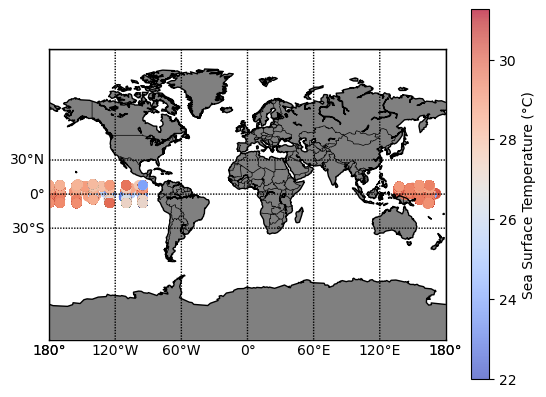

In [50]:
#how sst is spread across the pacific
# extract the relevant columns from the dataframe
lats = df['Latitude'].values
lons = df['Longitude'].values
sst = df['Sea_Surface_Temp'].values

# set up the map using the Basemap library
map = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
              llcrnrlon=-180,urcrnrlon=180,resolution='c')
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='gray')
map.drawmapboundary()

# convert the lat/lon coordinates into map projection coordinates
x, y = map(lons, lats)

# plot the sea surface temperature as colored dots on the map
map.scatter(x, y, c=sst, cmap='coolwarm', alpha=0.7)

# add a colorbar legend to the plot
plt.colorbar(label='Sea Surface Temperature (°C)')

# add latitude and longitude labels
map.drawparallels(np.arange(-30., 31., 30.), labels=[1,0,0,0], fontsize=10)
map.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], fontsize=10)

# show the plot
plt.show()

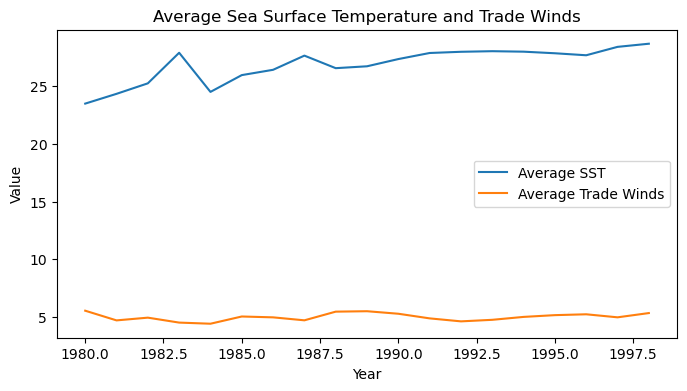

In [51]:
# Group the data by year and calculate the average
df['Year'] = pd.to_datetime(df['R_Date']).dt.year
yearly_avg = df.groupby('Year').mean()

# Extract the relevant data
years = yearly_avg.index
avg_sst = yearly_avg['Sea_Surface_Temp']
avg_trade_winds = yearly_avg['Trade_Winds']

# Create a line plot for the average SST and trade winds
plt.figure(figsize=(8, 4))
plt.plot(years, avg_sst, label='Average SST')
plt.plot(years, avg_trade_winds, label='Average Trade Winds')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Sea Surface Temperature and Trade Winds')
plt.legend()
plt.show()


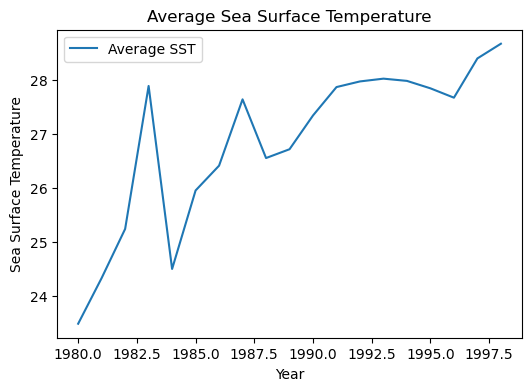

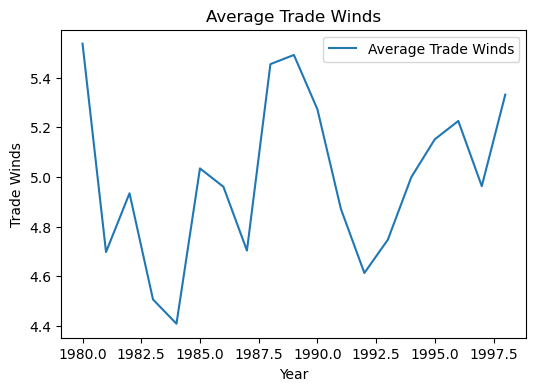

In [52]:
# Group the data by year and calculate the average
df['Year'] = pd.to_datetime(df['R_Date']).dt.year
yearly_avg = df.groupby('Year').mean()

# Extract the relevant data
years = yearly_avg.index
avg_sst = yearly_avg['Sea_Surface_Temp']
avg_trade_winds = yearly_avg['Trade_Winds']

# Create a line plot for the average SST
plt.figure(figsize=(6, 4))
plt.plot(years, avg_sst, label='Average SST')
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature')
plt.title('Average Sea Surface Temperature')
plt.legend()
plt.show()

# Create a line plot for the average trade winds
plt.figure(figsize=(6, 4))
plt.plot(years, avg_trade_winds, label='Average Trade Winds')
plt.xlabel('Year')
plt.ylabel('Trade Winds')
plt.title('Average Trade Winds')
plt.legend()
plt.show()


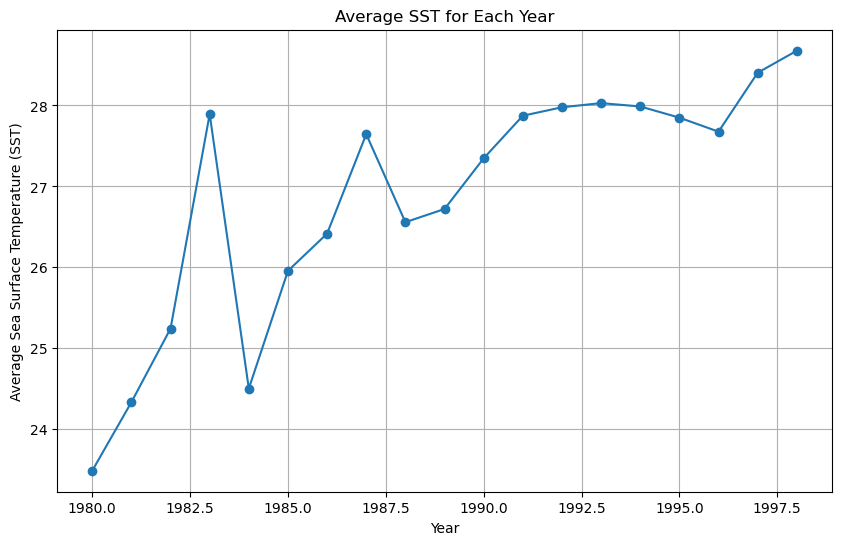

In [53]:
# Avg sst in The dATa before
average_sst = df.groupby('Year')['Sea_Surface_Temp'].mean()

#Viz it out
plt.figure(figsize=(10, 6))
plt.plot(average_sst.index, average_sst.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Sea Surface Temperature (SST)')
plt.title('Average SST for Each Year')
plt.grid(True)
plt.show()

In [54]:
#select sst for high and low trade winds with latitude
#select 

In [55]:
#weather predictions

In [56]:
#  Feature selection
features = ['Latitude', 'Longitude', 'Zonal_Winds', 'Meridional_Winds', 'Humidity', 'Air_Temp', 'Trade_Winds']
target = 'Sea_Surface_Temp'
X = df[features]
y = df[target]


In [57]:
# Assuming your DataFrame is named 'data'
new_data = df.sample(n=1, random_state=42)  
new_data = new_data[features]  

# Print the placeholder values
print("Placeholder values:")
print(new_data.values)


Placeholder values:
[[  -2.16       -170.06         -3.4           1.2          70.3
    27.49          3.60555128]]


In [58]:
#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
#  Choose a prediction model
model = LinearRegression()  # You can replace this with any other regression model


In [60]:
#  Train the model
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Validate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7370937581787329


In [62]:
#  Predict weather
data = pd.DataFrame([[8.04,-110.15,-4.8,-6.6,78.61058201,27.30343915,8.16088231]], columns=features)
predicted_temp = model.predict(data)
print(f"Predicted SST: {predicted_temp}")


Predicted SST: [28.09601943]


In [63]:
weather_df = df[['Humidity', 'Air_Temp', 'Trade_Winds', 'Sea_Surface_Temp', 'R_Date']]

In [64]:
weather_df['Year'] = pd.to_datetime(weather_df['R_Date']).dt.year
yearly_avg = weather_df.groupby('Year').mean()
# Calculate the average sea surface temperature for each year
avg_temp_year = weather_df.groupby('Year')['Sea_Surface_Temp'].mean().reset_index()

# Create an interactive line plot
plot = px.line(avg_temp_year, x='Year', y='Sea_Surface_Temp', title='Average Sea Surface Temperature Over Time', template='simple_white')

# Customize axis labels
plot.update_layout(xaxis_title='Year', yaxis_title='Average Sea Surface Temperature')

# Display the plot
plot.show()

In [65]:
weather_df.corr()

Humidity  Air_Temp  Trade_Winds  Sea_Surface_Temp      Year
Humidity          1.000000 -0.290436    -0.008973         -0.273681 -0.204418
Air_Temp         -0.290436  1.000000    -0.245505          0.870332  0.248448
Trade_Winds      -0.008973 -0.245505     1.000000         -0.309113  0.018028
Sea_Surface_Temp -0.273681  0.870332    -0.309113          1.000000  0.270238
Year             -0.204418  0.248448     0.018028          0.270238  1.000000

In [66]:
corr = weather_df.corr()

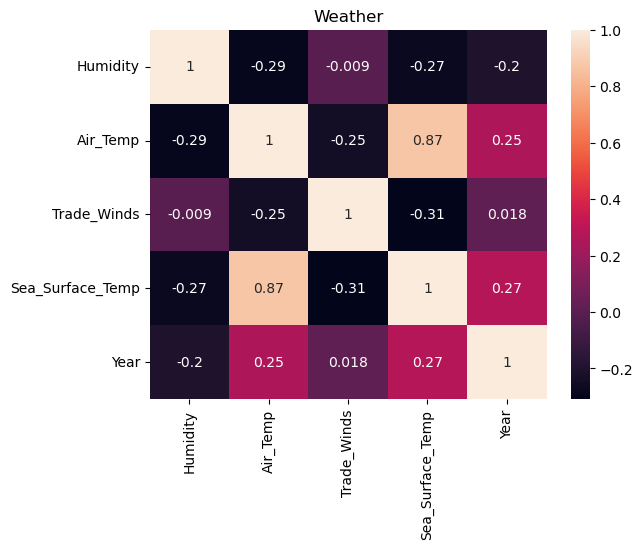

In [67]:
heatmap = sns.heatmap(corr, annot=True)

# Set the properties
heatmap.set(xlabel='', ylabel='', title='Weather')

# Display the heatmap
plt.show()

In [68]:
# Select the features and target variable
features = ['Air_Temp','Humidity', 'Trade_Winds']
target = 'Sea_Surface_Temp'

X = df[features]
y = df[target]

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)

# Train and evaluate Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Compare the Mean Squared Error (MSE) of the models
print(f"Linear Regression MSE: {linear_mse}")
print(f"Random Forest Regression MSE: {rf_mse}")


Linear Regression MSE: 0.7867197843457815
Random Forest Regression MSE: 0.5260927942025821


In [69]:

# Calculate additional evaluation metrics
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the additional evaluation metrics
print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression R^2: {linear_r2}")
print(f"Random Forest Regression MAE: {rf_mae}")
print(f"Random Forest Regression R^2: {rf_r2}")


Linear Regression MAE: 0.5940618054044533
Linear Regression R^2: 0.7694661949751253
Random Forest Regression MAE: 0.5042581270518147
Random Forest Regression R^2: 0.8458381547572937


In [70]:
# Get the feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a dataframe of feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)


       Feature  Importance
0     Air_Temp    0.809264
1     Humidity    0.110185
2  Trade_Winds    0.080551


In [ ]:


# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Average MSE:", cv_scores.mean())


In [ ]:


# Save the trained model to disk
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model from disk
loaded_model = joblib.load('random_forest_model.pkl')

# Use the loaded model to make predictions
new_data = pd.DataFrame([[25.5, 0.6, 10.2]], columns=features)
predictions = loaded_model.predict(new_data)
print("Predictions:", predictions)


In [ ]:
df.columns

In [ ]:
# Select numerical columns for normalization
numerical_cols = ['Zonal_Winds', 'Meridional_Winds', 'Humidity', 'Air_Temp', 'Sea_Surface_Temp', 'Trade_Winds']

# Normalize the selected columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[numerical_cols])

# Create a new DataFrame with the scaled values
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# Display the scaled DataFrame
print(df_scaled.head())


In [ ]:
# transform time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
   
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var{}(t-{})'.format(j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i).iloc[:, -1])
        if i == 0:
            names += ['var(t)']
        else:
            names += ['var(t+{})'.format(i)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
df_reframed = series_to_supervised(df_scaled, 1, 1)
df_reframed

In [ ]:
# train-test split (80:20)
values = df_reframed.values
n_train = int(len(values) * 0.8)
x_train, x_test, y_train, y_test = values[:n_train, :-1], values[n_train:, :-1], values[:n_train, -1:], values[n_train:, -1:]    # 1 is n_out
# reshape input to be 3D [samples (rows), timesteps (n_in), features (cols//n_in)]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# train-test split (80:20)
values = df_reframed.values
n_train = int(len(values) * 0.8)
x_train, x_test, y_train, y_test = values[:n_train, :-1], values[n_train:, :-1], values[:n_train, -1:], values[n_train:, -1:]    # 1 is n_out
# reshape input to be 3D [samples (rows), timesteps (n_in), features (cols//n_in)]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])


### Prediction

In [ ]:
# Define the dependent variable
y = weather_df['Sea_Surface_Temp']

# Define the independent variables
X = df[['Latitude', 'Longitude', 'Trade_Winds', 'Humidity', 'Air_Temp']]

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print(model.coef_)

In [ ]:
df


In [ ]:
# Filter the data for the selected features and target
selected_features = ['R_Date', 'Air_Temp', 'Humidity', 'Trade_Winds', 'Sea_Surface_Temp']
selected_data = df[selected_features].copy()

In [ ]:
# datetime
selected_data['R_Date'] = pd.to_datetime(selected_data['R_Date'])

In [ ]:
# Reset the index
selected_data.reset_index(drop=True, inplace=True)

In [ ]:
selected_data['Year'] = selected_data['R_Date'].dt.year
average_sst_per_year = selected_data.groupby('Year')['Sea_Surface_Temp'].mean().reset_index()

In [ ]:
average_sst_per_year

In [ ]:
### Training with Pytorch

In [ ]:
features = average_sst_per_year['Year'].values.reshape(-1, 1)
target = average_sst_per_year['Sea_Surface_Temp'].values.reshape(-1, 1)

In [ ]:
normalized_features = (features - features.mean()) / features.std()
normalized_target = (target - target.mean()) / target.std()

In [ ]:
tensor_features = torch.tensor(normalized_features, dtype=torch.float32)
tensor_target = torch.tensor(normalized_target, dtype=torch.float32)


In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
dataset = TensorDataset(tensor_features, tensor_target)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = CNN()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [ ]:
#### Projections

In [ ]:
projection_years = range(1999, 2011)
projection_features = torch.tensor(list(projection_years), dtype=torch.float32)
normalized_projection_features = (projection_features - features.mean()) / features.std()
projection_outputs = model(normalized_projection_features.reshape(-1, 1))
projection_outputs = projection_outputs.detach().numpy() * target.std() + target.mean()

projection_dataframe = pd.DataFrame({'Year': projection_years, 'Average_SST': projection_outputs.flatten()})

In [ ]:
projection_dataframe

In [ ]:
##### Plot projection with existing records

In [ ]:
plt.figure(figsize=(10, 6))
# Existing Data
plt.plot(average_sst_per_year['Year'], average_sst_per_year['Sea_Surface_Temp'], marker='o', label='Actual Data')

# Projected DAta
plt.plot(projection_dataframe['Year'], projection_dataframe['Average_SST'], marker='o', label='Projected Data')


plt.title('Average Sea Surface Temperature')
plt.xlabel('Year')
plt.ylabel('SST')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
regression_model = LinearRegression()
regression_model.fit(features, target)

In [ ]:
# Create projection years
projection_years = range(1999, 2011)

In [ ]:
# Make projections using the regression model
projection_features = np.array(list(projection_years)).reshape(-1, 1)
projection_outputs = regression_model.predict(projection_features)

In [ ]:
# Create a projection dataframe for the years 1999 to 2010
projection_dataframe_regression = pd.DataFrame({'Year': projection_years, 'Average_SST': projection_outputs.flatten()})
projection_dataframe_regression

In [ ]:
plt.figure(figsize=(10, 6))
# Existing Data
plt.plot(average_sst_per_year['Year'], average_sst_per_year['Sea_Surface_Temp'], marker='o', label='Existing Data')

# Projected DAta
plt.plot(projection_dataframe_regression['Year'], projection_dataframe_regression['Average_SST'], marker='o', label='Projected Data')


plt.title('Average Sea Surface Temperature')
plt.xlabel('Year')
plt.ylabel('SST')
plt.legend()
plt.grid(True)
plt.show()